# Toxic Comment Classification Challenge - Abdullah, Irina, Natasha

The project is to build a model capable of detecting the toxicity of a comment, assigning probabilities for different levels of toxicity. Our model is trained on a wikipedia dataset comprised of comments from Wikipedia's discussion pages.

You can find the dataset here : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview


## Import libraries

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data import from google for google colab:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#data = pd.read_csv('/content/drive/MyDrive/comments_classification/train.csv')
#data.head()

## Data import for other Notebooks

In [6]:
data = pd.read_csv('data/train.csv')
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

The dataset is composed of each comment id number, the comment itself (texts), and 6 toxic categories.

Here we can see that we have 6 different categories of toxicity : toxic, severely toxic, obscene, threatening, insulting, identity hateread. 

Each comment is evaluated independently for his correspondance to each toxicity categories. If a comment belong to a toxicity category, it will be signified by a 1 on the table, else, it is a 0. Entries with 0 under all the toxicity categories are considered non-toxic comments.

## Cleaning text

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Here we can see that the dataset is already cleaned, with no null entries.

In [9]:
# Installing text cleaning packages
!pip install neattext

Defaulting to user installation because normal site-packages is not writeable


This packages help clean unstructured text data by reducing noises (remove special characters and stopwords), and by reducing repetition of using the same code for text preprocessing.

In [10]:
# importing text cleaning packages
import neattext as nt
import neattext.functions as nfx

### Comment Example

In [11]:
# Reading 3rd comment
ex = data['comment_text'][3]
ex

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [12]:
# Reading with the proper synthax the 3rd comment
clean_ex = nt.TextFrame(ex)
clean_ex

TextFrame(text=""
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.

There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "")

In [13]:
# describing the 3rd comment
clean_ex.describe()

Key      Value          
Length  : 622            
vowels  : 196            
consonants: 290            
stopwords: 62             
punctuations: 20             
special_char: 21             
tokens(whitespace): 113            
tokens(words): 116            


Here we can see that the neattext packages help reading the proper synthax of each comment, and allows to see a description of each comments.

In [14]:
# Check percentage of comments that are toxic compared to normal comments
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

90% of the comments are non-toxic.

### Clean data

In [15]:
# clean data by removing ponctuation and stopwords, and putting every word into lowercases
data['clean_comments'] = data['comment_text'].str.lower().apply(lambda x: nfx.clean_text(x, puncts=True, stopwords=True,
                                                             urls=True, emails=True, numbers=True, emojis=True,
                                                             special_char=True, phone_num=True, non_ascii=True, multiple_whitespaces=True,
                                                             contractions=True, currency_symbols=True, custom_pattern=r'@\S+'))
data['clean_comments']

0         explanation edits username hardcore metallica ...
1         daww matches background colour im seemingly st...
2         hey man im trying edit war guy constantly remo...
3         cant real suggestions improvement wondered sec...
4                       sir hero chance remember page thats
                                ...                        
159566    and second time asking view completely contrad...
159567                    ashamed horrible thing talk page 
159568    spitzer umm theres actual article prostitution...
159569      looks like actually speedy version deleted look
159570    dont think understand came idea bad right away...
Name: clean_comments, Length: 159571, dtype: object

#### Separate our dataset into 6 sections. Each section containes the id, the text comment, and the category

In [16]:
data_sev = data.loc[:,['id','clean_comments','severe_toxic']]

In [17]:
data_obs = data.loc[:,['id','clean_comments','obscene']]

In [18]:
data_thr = data.loc[:,['id','clean_comments','threat']]

In [19]:
data_ins = data.loc[:,['id','clean_comments','insult']]

In [20]:
data_ide = data.loc[:,['id','clean_comments','identity_hate']]

In [21]:
data_tox = data.loc[:,['id','clean_comments','toxic']]




## Exploratory Data Analysis

In [22]:
# Here is the total number of rows in the dataset
num_rows = len(data)
num_rows

159571

In [48]:
#Number of words in each reviews 
data.toxic.value_counts(normalize=True)

data['nbr_words_per_comments'] = data['comment_text'].str.count(' ') + 1

/home/rikki/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


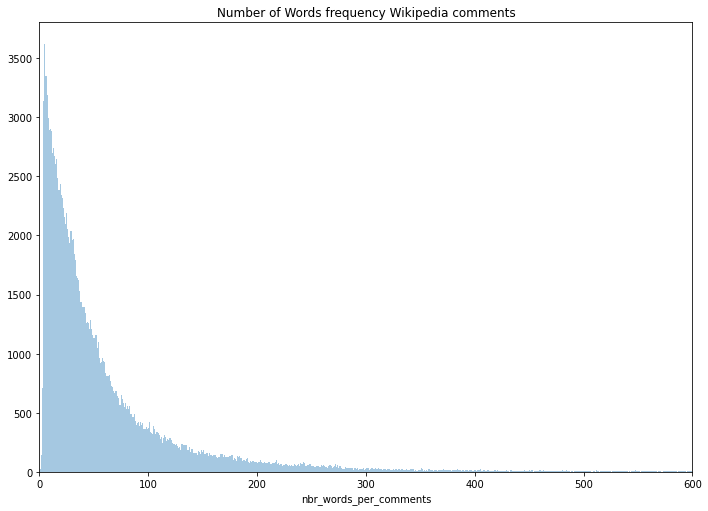

In [49]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(data["nbr_words_per_comments"], bins=np.arange(data["nbr_words_per_comments"].min(), data["nbr_words_per_comments"].max()+1),kde=False,hist_kws={"align" : "left"})
g = g.set(xlim=(0,600))
plt.title("Number of Words frequency Wikipedia comments")
plt.show(g)

In [50]:
import statistics

statistics.mean(data["nbr_words_per_comments"])

67.86696204197504

In [51]:
statistics.median(data["nbr_words_per_comments"])

36

In [52]:
# create a column counting number of uppercases
data['nbr_upper'] = data['comment_text'].apply(lambda x: sum(1 for elem in str(x) if elem.isupper()))
data['nbr_upper']

0         17
1          8
2          4
3         11
4          2
          ..
159566     2
159567     2
159568     4
159569     2
159570     4
Name: nbr_upper, Length: 159571, dtype: int64

In [29]:
# Check percentage of comments that are toxic compared to normal comments
count = data.toxic.value_counts(normalize=True)
count

0    0.904156
1    0.095844
Name: toxic, dtype: float64

In [30]:
count = np.array(count)
count

array([0.90415552, 0.09584448])

/home/rikki/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


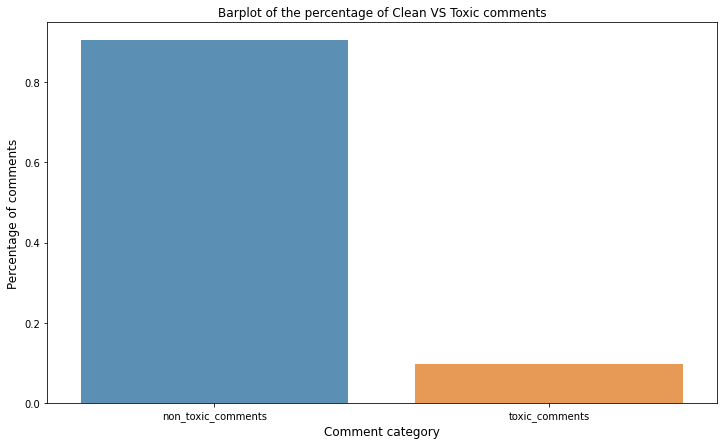

In [33]:
# Plot a chart with the following size
# Here we are working with non cleaned comments
plt.figure(figsize=(12,7))

ax = sns.barplot(["non_toxic_comments","toxic_comments"], count, alpha=0.8)

plt.title("Barplot of the percentage of Clean VS Toxic comments")
plt.ylabel('Percentage of comments', fontsize=12)
plt.xlabel('Comment category', fontsize=12)



plt.show()

In [23]:
data_sum = np.count_nonzero(data.iloc[:,2:8], axis=0)
data_sum = pd.DataFrame(data_sum)
data_sum.index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_sum = data_sum[0]
print("Number of toxic comment for each category:\n\n", data_sum)

Number of toxic comment for each category:

 toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
Name: 0, dtype: int64


In [24]:
my_list = list(range(len(data_sum)))
data_perc_list = list(map(lambda x: data_sum[x]*100/num_rows , my_list))

# convert into floats element of a list
data_perc_list = [round(float(s),1) for s in data_perc_list]

data_perc = pd.DataFrame(data_perc_list)
data_perc.index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_perc = data_perc[0]
print("Percentage of toxic comments in specific category related to total number of comments:\n\n", data_perc)

Percentage of toxic comments in specific category related to total number of comments:

 toxic            9.6
severe_toxic     1.0
obscene          5.3
threat           0.3
insult           4.9
identity_hate    0.9
Name: 0, dtype: float64


/home/rikki/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


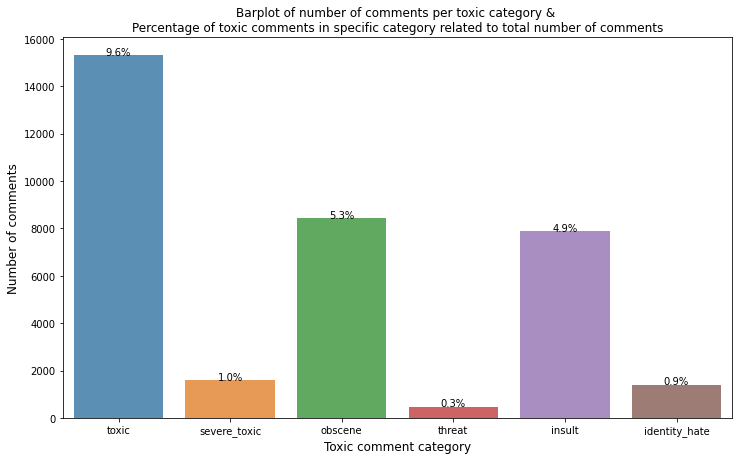

In [25]:
# Plot a chart with the following size
plt.figure(figsize=(12,7))

ax = sns.barplot(data_sum.index, data_sum.values, alpha=0.8)

plt.title("Barplot of number of comments per toxic category & \nPercentage of toxic comments in specific category related to total number of comments")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Toxic comment category', fontsize=12)


patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(data_perc_list[i]), (x, y), ha='center')

plt.show()

Here we can see a barplot of the repartition of toxic comment based on the 6 toxic categories. Approximately 10% of all comments are toxic, 5% are either obscene or insults, 1% are either severly toxic or identity hate, and approximately 0% are threats. We can see that percentages of toxic comments in specific category related to total number of comments are distributed similarly than the number of comments per toxic categories.  

In [26]:
my_list = list(range(len(data_sum)))
data_perc_list = list(map(lambda x: data_sum[x]*100/data_sum.sum() , my_list))

# convert into floats element of a list
data_perc_list = [round(float(s)) for s in data_perc_list]

data_perc = pd.DataFrame(data_perc_list)
data_perc.index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_perc = data_perc[0]
print("Percentage of toxic comment in each category related to the total number of toxic comments:\n\n", data_perc)

Percentage of toxic comment in each category related to the total number of toxic comments:

 toxic            44
severe_toxic      5
obscene          24
threat            1
insult           22
identity_hate     4
Name: 0, dtype: int64


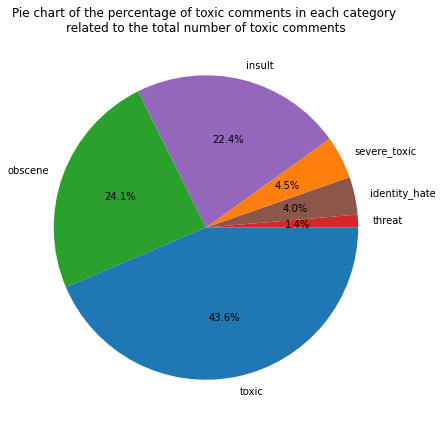

In [27]:
plt.figure(figsize=(12,7))

plt.title("Pie chart of the percentage of toxic comments in each category \nrelated to the total number of toxic comments")

y = data_sum.sort_values()
mycolors = ["tab:red", "tab:brown", "tab:orange", "tab:purple", "tab:green", "tab:blue"]

plt.pie(y, labels = y.index, colors = mycolors, autopct='%1.1f%%')
plt.show() 

Here we can see a pie chart of the percentage of toxic comments in each of the 6 categories related to the total number of toxic comments. Approximately 44% of toxic comments are toxic, around 23% of toxic comments are either obscene or insults, 4% are either severly toxic or identity hate, and approximately 1% are threats. This is interesting because this repartition is similar to the distribution of percentages of toxic comments in specific category related to total number of comments.

We can now wonder what toxic words come back the most in each toxic category!

In [35]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [36]:
#pip install wordcloud

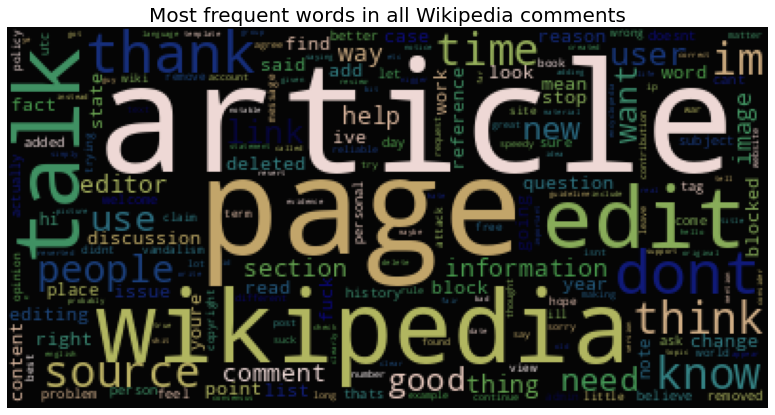

In [47]:
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
text=data.clean_comments.values

wc = WordCloud(collocations=False).generate(' '.join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Most frequent words in all Wikipedia comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [37]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.clean_comments.values

    wc = WordCloud(collocations=False).generate(' '.join(text))

    plt.figure(figsize=(30,30))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

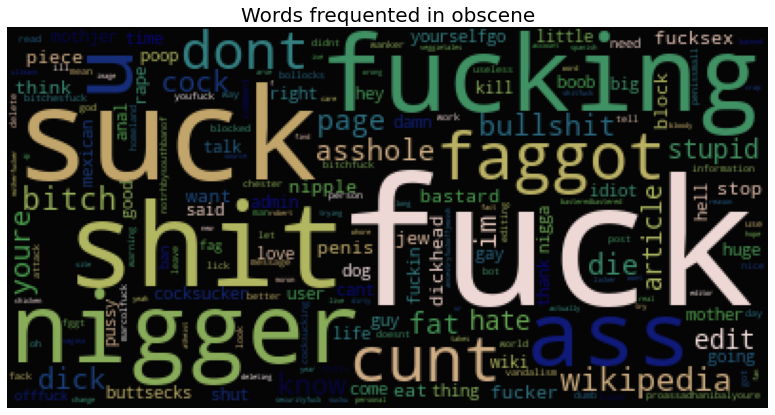

In [29]:
wordcloud(data_obs, 'obscene')

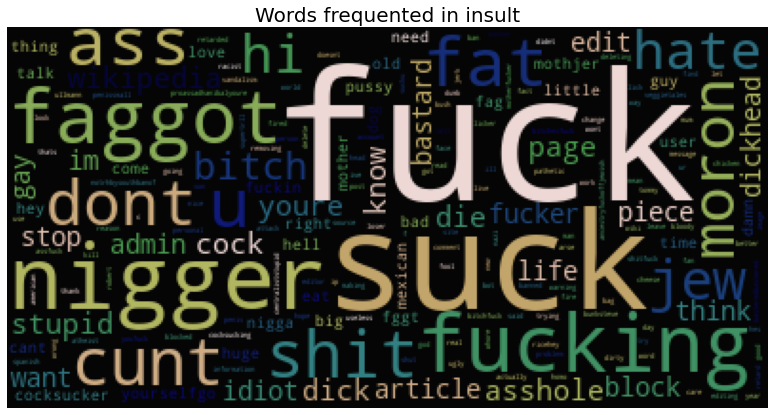

In [30]:
wordcloud(data_ins, 'insult')

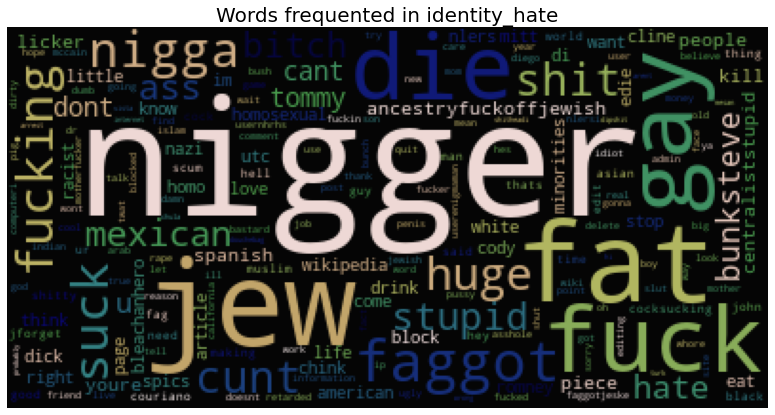

In [31]:
wordcloud(data_ide,'identity_hate')

By comparing the worldcloud of the obscene category, the insult category, and the identity hatetread category, we see similar words turning up, but with different importance/frequencies. For example, the words "nigger", "jew", "fat", and "gay" are the most appareant words of the identity hatetread category but also appears in the obscene category and the insult category. However some recurrant insluts and obscene words we observe in their respective category (such as "fuck" or "dick") do not appear in the identity hatetread category.

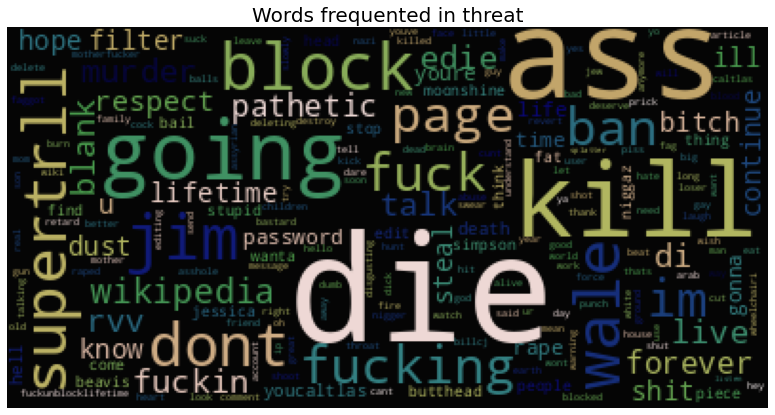

In [38]:
wordcloud(data_thr, 'threat')

## More visualization!

In [53]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

#### Correlation between toxic categories

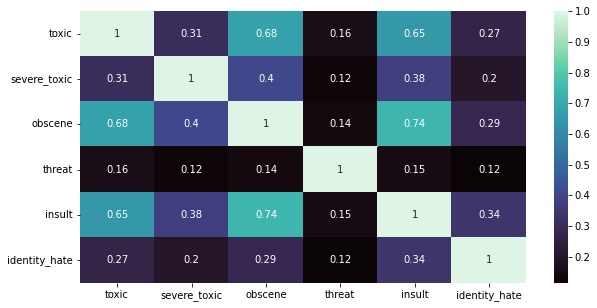

In [54]:
#Correlation between toxic categories
labels_cor = data[labels].corr(method='pearson')
plt.figure(figsize=(10,5))
sns.heatmap(labels_cor, annot=True, cmap ='mako');

#### Dataframe for capital letters proportion

In [61]:
# Making a copy
data1 = data.copy()


In [56]:
# Adding a number of caraters in a comment
data1['length'] = data1.comment_text.str.len()             

In [57]:
# Adding a number of capital letters in a comment
data1['capitals'] =  data1.comment_text.apply(lambda x: sum(1 for elem in str(x) if elem.isupper()))

In [58]:
# Adding a proportion
data1['proportion'] = data1.capitals/data1.length
data1

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0           0             0        0       0       0              0   
1           0             0        0       0       0              0   
2           0             0        0       0       0              0   
3           0             0        0       0       0              0   
4           0             0        0       0       0              0   
...       ...           ...      ...     ...     ...            ...   
159566      0             0        0       0       0              0   
159567      0             0        0       0       0              0   
159568      0             0        0       0       0              0   
159569      0             0        0       0       0              0   
159570      0             0        0       0       0              0   

                                           clean_comments  \
0       explanation edits username hardcore metallica ...   
1       daww matches background colour im seemingly st...   
2       hey man im trying edit war guy constantly remo...   
3       cant real suggestions improvement wondered sec...   
4                     sir hero chance remember page thats   
...                                                   ...   
159566  and second time asking view completely contrad...   
159567                  ashamed horrible thing talk page    
159568  spitzer umm theres actual article prostitution...   
159569    looks like actually speedy version deleted look   
159570  dont think understand came idea bad right away...   

        nbr_words_per_comments  nbr_upper  length  capitals  proportion  
0                           42         17     264        17    0.064394  
1                           18          8     112         8    0.071429  
2                           42          4     233         4    0.017167  
3                          112         11     622        11    0.017685  
4                           13          2      67         2    0.029851  
...                        ...        ...     ...       ...         ...  
159566                      49          2     295         2    0.006780  
159567                      19          2      99         2    0.020202  
159568                      13          4      81         4    0.049383  
159569                      25          2     116         2    0.017241  
159570                      39          4     189         4    0.021164  

[159571 rows x 14 columns]

In [53]:
# Adding a new column "is_clean" True for non_toxic comments, False for each toxic comment
data1["is_clean"] = ~data1[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].any(axis="columns")

In [64]:
#Checking difference in new columns for Toxixc and Non-toxic comments
data1.groupby(["is_clean"])['length','capitals','proportion'].mean()

<ipython-input-64-34ba23c9a755>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1.groupby(["is_clean"])['length','capitals','proportion'].mean()


length   capitals  proportion
is_clean                                   
False     305.672604  42.980770    0.109680
True      406.885138  14.236993    0.044497

<AxesSubplot:xlabel='Comment is clean', ylabel='Proportion of capital letters in the comment'>

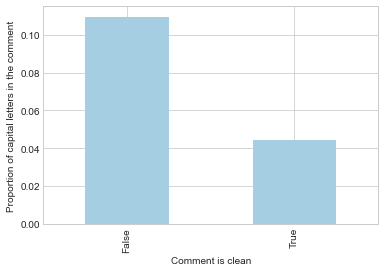

In [135]:
data1.groupby(["is_clean"]).proportion.mean().plot.bar(xlabel = 'Comment is clean',ylabel ="Proportion of capital letters in the comment",colormap='Paired' )

In [65]:
#Adding the new column "is_clean" to data
data["is_clean"] = ~data[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].any(axis="columns")

In [72]:
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\r\nWhy the edits made under my use...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \r\n\r\nThat...   
159568  ffee36eab5c267c9  Spitzer \r\n\r\nUmm, theres no actual article ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\r\nAnd ... I really don't think you understa...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0           0             0        0       0       0              0   
1           0             0        0       0       0              0   
2           0             0        0       0       0              0   
3           0             0        0       0       0              0   
4           0             0        0       0       0              0   
...       ...           ...      ...     ...     ...            ...   
159566      0             0        0       0       0              0   
159567      0             0        0       0       0              0   
159568      0             0        0       0       0              0   
159569      0             0        0       0       0              0   
159570      0             0        0       0       0              0   

                                           clean_comments  is_clean  
0       explanation edits username hardcore metallica ...      True  
1       daww matches background colour im seemingly st...      True  
2       hey man im trying edit war guy constantly remo...      True  
3       cant real suggestions improvement wondered sec...      True  
4                     sir hero chance remember page thats      True  
...                                                   ...       ...  
159566  and second time asking view completely contrad...      True  
159567                  ashamed horrible thing talk page       True  
159568  spitzer umm theres actual article prostitution...      True  
159569    looks like actually speedy version deleted look      True  
159570  dont think understand came idea bad right away...      True  

[159571 rows x 10 columns]

#### Comment Length: Clean vs Toxic

Text(0.5, 1.0, 'Comment Length: Clean vs Toxic')

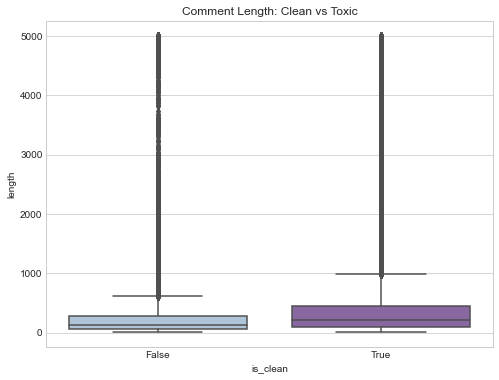

In [134]:
title = "Comment Length: Clean vs Toxic"
plt.figure(figsize=(8,6))
plt.style.use('seaborn-whitegrid')

# we're using data1 with new columns length and is_clean
sns.boxplot(data=data1,x="is_clean",y="length",palette="BuPu")
plt.title(f"{title}")

#### Tags per comment

In [122]:
#function for counting tags and add it into a new column
def add_num_tags(data):
    '''
    Function computes number of tags attached to each comment 
    '''
    
    # creating a copy
    data = data.copy()
    
    # toxicity type list
    toxicity_types = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
    
    # adding num_tags column
    data["num_tags"] = data[toxicity_types].sum(axis=1)
    
    return data

<AxesSubplot:title={'center':'Number of Tags Per Comment'}, xlabel='num_tags', ylabel='count'>

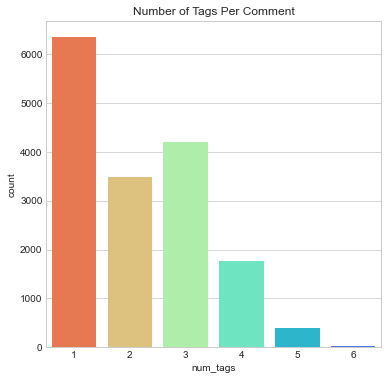

In [124]:

# count plot of number of tags per comment
title = "Number of Tags Per Comment"
temp_data = add_num_tags(data)

# filtering out those comments who have at least 1 tag
temp_data = temp_data[temp_data["num_tags"]>0]


plt.figure(figsize=(6,6))
plt.title(f"{title}")
sns.countplot(x="num_tags",data=temp_data,palette='rainbow_r')
    


On the barplot above we saw that approximately 10% of all comments are toxic, 5% are either obscene or insults, 1% are either severly toxic or identity hate, and approximately 0% are threats. We need the datset to be balanced, so to have an appropriate proportion of toxic and non-toxic comments for each categories.

To do that, we need to take a subset of each data category where the proportion of the toxic comments are at least 20% of the non-toxic comments, better if its 50%.

#### Data toxicicity column

In [39]:
tox_len = data_tox[data_tox.toxic == 1].toxic.value_counts()
tox_len[1]

15294

In [40]:
data_tox_1 = data_tox[data_tox.toxic == 1].head(tox_len[1])
data_tox_1.shape

(15294, 3)

In [41]:
data_tox_0 = data_tox[data_tox.toxic == 0].head(tox_len[1])
data_tox_0.shape

(15294, 3)

In [42]:
# concatenate the toxic and non-toxic comments
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(30588, 3)

#### Data severe toxicicity column

In [43]:
sev_len = data_sev[data_sev.severe_toxic == 1].severe_toxic.value_counts()
sev_len[1]

1595

In [44]:
data_sev_1 = data_sev[data_sev.severe_toxic == 1].head(sev_len[1])
data_sev_0 = data_sev[data_sev.severe_toxic == 0].head(sev_len[1])
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

#### Data obscene column

In [45]:
obs_len = data_obs[data_obs.obscene == 1].obscene.value_counts()
obs_len[1]

8449

In [46]:
data_obs_1 = data_obs[data_obs.obscene == 1].head(obs_len[1])
data_obs_0 = data_obs[data_obs.obscene == 0].head(obs_len[1])
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(16898, 3)

#### Data threat column

In [31]:
thr_len = data_thr[data_thr.threat == 1].threat.value_counts()
thr_len[1]

478

478*2 threats is not enough for a training dataset, so we are going to do 20% toxic comments and 80% non-toxic comments.

If 478 is 20%, than 1912 is 80%.

In [32]:
data_thr_1 = data_thr[data_thr.threat == 1].head(thr_len[1])
data_thr_0 = data_thr[data_thr.threat == 0].head(1912)
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

#### Data insult column

In [33]:
ins_len = data_ins[data_ins.insult == 1].insult.value_counts()
ins_len[1]

7877

In [34]:
data_ins_1 = data_ins[data_ins.insult == 1].head(ins_len[1])
data_ins_0 = data_ins[data_ins.insult == 0].head(ins_len[1])
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(15754, 3)

#### Data identity threats column

In [35]:
ide_len = data_ide[data_ide.identity_hate == 1].identity_hate.value_counts()
ide_len[1]

1405

In [36]:
data_ide_1 = data_ide[data_ide.identity_hate == 1].head(ide_len[1])
data_ide_0 = data_ide[data_ide.identity_hate == 0].head(ide_len[1])
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(2810, 3)

## Model

- logistic regression
- KNN
- Niaves bayes classifier
- SVM
- Random forest

In [68]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.feature_extraction.text import CountVectorizer

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [69]:

import sklearn


print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [70]:
#pip install scikit-learn== 0.33

In [71]:
# TO RUN IF ISSUE APPEAR
#pip install auto_ts --upgrade

#### Train_test_split()

In [72]:
# data correspond to on of the 6 toxicicity dataset
# column correspond to the name of the column of the toxicity

def my_train_test_split (data, column):

    # Split the data into X and y datasets
    X = data.clean_comments
    y = data[column]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Because we are handeling text, we need to use vectorisation to transform each text 
    #    into a vector, just like we do in word embedding
    vectorizer = CountVectorizer(stop_words='english')
    
    # scaling or standardization of our dataset
    X_train = vectorizer.fit_transform(X_train) 
    X_test  = vectorizer.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [82]:
# n_neighbors is for the number of neighbour to add to the KNN classifier

def KNN_classifier (X_train, y_train, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    end = f1_score(knn.predict(X_test), y_test)

    return end
    


In [83]:
X_train, X_test, y_train, y_test = my_train_test_split(data_tox_done, 'toxic')

In [84]:
KNN_classifier (X_train, y_train, 5)

0.7281564633722949

In [ ]:
from sklearn.metrics import roc_auc_score


In [75]:
from sklearn.neighbors import KNeighborsClassifier


# knn
model2 = KNeighborsClassifier(n_neighbors=5)


model2.fit(X_train, y_train)

pred_prob2 = model2.predict_proba(X_test)

In [76]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [77]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score2)

0.8141563985792917


## Logistic regression and SVM

### Searching for k-value

In [ ]:
#Importing libraries
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

Ideal: 0.866
> folds=2, accuracy=0.858 (0.858,0.859)
> folds=3, accuracy=0.863 (0.858,0.867)
> folds=4, accuracy=0.864 (0.858,0.869)
> folds=5, accuracy=0.864 (0.859,0.868)
> folds=6, accuracy=0.864 (0.862,0.868)
> folds=7, accuracy=0.865 (0.860,0.872)
> folds=8, accuracy=0.865 (0.858,0.874)
> folds=9, accuracy=0.865 (0.860,0.875)
> folds=10, accuracy=0.865 (0.858,0.870)
> folds=11, accuracy=0.865 (0.858,0.873)
> folds=12, accuracy=0.866 (0.855,0.873)
> folds=13, accuracy=0.866 (0.858,0.872)
> folds=14, accuracy=0.866 (0.852,0.871)
> folds=15, accuracy=0.866 (0.854,0.877)
> folds=16, accuracy=0.866 (0.853,0.881)
> folds=17, accuracy=0.865 (0.854,0.883)
> folds=18, accuracy=0.866 (0.853,0.881)
> folds=19, accuracy=0.866 (0.855,0.882)
> folds=20, accuracy=0.866 (0.852,0.882)
> folds=21, accuracy=0.866 (0.844,0.879)
> folds=22, accuracy=0.866 (0.850,0.883)
> folds=23, accuracy=0.866 (0.847,0.875)
> folds=24, accuracy=0.866 (0.849,0.885)
> folds=25, accuracy=0.866 (0.842,0.882)
> folds=26,

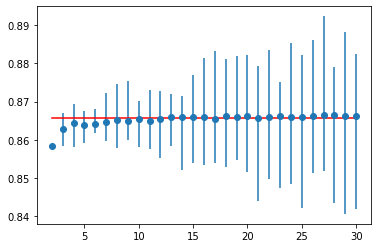

In [61]:

def evaluate_model(cv):
    # get the dataset
    tfidf_vec = TfidfVectorizer(ngram_range=(1,2), 
                            min_df=2, 
                            max_features=1000)
    X = data_tox_done.clean_comments
    X = tfidf_vec.fit_transform(X)
    y = data_tox_done.toxic
    # get the model
    model = LogisticRegression()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    #define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show() 

We can see that accuracy becoms higher starting from k = 12 , but we can see that error bars and difference between min and max values for accuracy is minimal for k = 10 and k = 13, so we can take one of these values for our model.

### Logistic regression + CountVectorizer

In [127]:
#Importing libraries

from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC

# Training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Metrics
from sklearn.metrics import roc_auc_score, log_loss, hamming_loss, accuracy_score, confusion_matrix,f1_score,classification_report


In [128]:
# data correspond to on of the 6 toxicicity dataset
# column correspond to the name of the column of the toxicity

def my_train_test_split_cvec (data, column):

    # Split the data into X and y datasets
    X = data.clean_comments
    y = data[column]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Because we are handeling text, we need to use vectorisation to transform each text 
    #    into a vector, just like we do in word embedding
    vectorizer = CountVectorizer(stop_words='english')
    
    # scaling or standardization of our dataset
    X_train = vectorizer.fit_transform(X_train) 
    X_test  = vectorizer.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [65]:
X_train, X_test, y_train, y_test = my_train_test_split_cvec (data_tox_done, 'toxic')

#### Best parameter for Logistic Regression:

In [66]:
lr = LogisticRegression()
paramC_lr = {"C": [5, 10, 50, 100, 150]}

lr_GS = GridSearchCV(lr, paramC_lr, scoring='f1', cv=13)
lr_GS.fit(X_train, y_train)
print("Best parameter for Logistic Regression: ", lr_GS.best_params_)


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best parameter for Logistic Regression:  {'C': 5}


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best parameter for Logistic Regression is C = 5

In [70]:
# Train Logistic Regression with the best parameter
lr_bp = LogisticRegression(C=5)

for i in range(13):
    lr_bp.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [ ]:
lr_bp = LogisticRegression(C=5)

for i in range(13):
    lr_bp.fit(X_train, y_train)
    

#### Results and evaluation 

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4535
           1       0.91      0.86      0.88      4642

    accuracy                           0.89      9177
   macro avg       0.89      0.89      0.89      9177
weighted avg       0.89      0.89      0.89      9177

0.8862373324615888
TN 4147
FP 388
FN 656
TP 3986
Accuracy:  0.886
AUC: 0.947
AUC2: 0.887
0.887
Log loss: 0.381


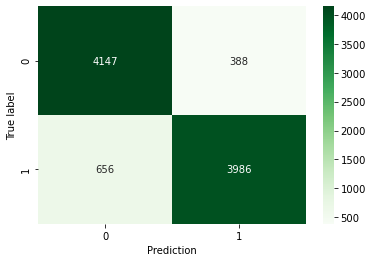

In [154]:
# Prediction
y_pred = lr_bp.predict(X_test)
y_pred_pr = lr_bp.predict_proba(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#Confusion_matrix
lr_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(lr_matrix, annot=True, fmt = 'g', cmap="Greens")
p.set_xlabel('Prediction')
p.set_ylabel('True label')

tn, fp, fn, tp = lr_matrix.ravel()
print("TN", tn)
print("FP", fp)
print("FN", fn)
print("TP", tp)

#Other metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),3))
print("AUC:", np.round(roc_auc_score(y_test, y_pred_pr [:, 1]),3))
print("AUC2:", np.round(roc_auc_score(y_test, y_pred),3))
print(np.round(auc(false_positive_rate, true_positive_rate), 3))
print ("Log loss:", np.round(log_loss(y_test, y_pred_pr),3))

### SVM + CountVectorizer

In [114]:
from sklearn.svm import SVC

Ideal: 0.866
> folds=2, accuracy=0.858 (0.858,0.859)
> folds=3, accuracy=0.863 (0.858,0.867)
> folds=4, accuracy=0.864 (0.858,0.869)
> folds=5, accuracy=0.864 (0.859,0.868)
> folds=6, accuracy=0.864 (0.862,0.868)
> folds=7, accuracy=0.865 (0.860,0.872)
> folds=8, accuracy=0.865 (0.858,0.874)
> folds=9, accuracy=0.865 (0.860,0.875)
> folds=10, accuracy=0.865 (0.858,0.870)
> folds=11, accuracy=0.865 (0.858,0.873)
> folds=12, accuracy=0.866 (0.855,0.873)
> folds=13, accuracy=0.866 (0.858,0.872)
> folds=14, accuracy=0.866 (0.852,0.871)
> folds=15, accuracy=0.866 (0.854,0.877)
> folds=16, accuracy=0.866 (0.853,0.881)
> folds=17, accuracy=0.865 (0.854,0.883)
> folds=18, accuracy=0.866 (0.853,0.881)
> folds=19, accuracy=0.866 (0.855,0.882)
> folds=20, accuracy=0.866 (0.852,0.882)
> folds=21, accuracy=0.866 (0.844,0.879)
> folds=22, accuracy=0.866 (0.850,0.883)
> folds=23, accuracy=0.866 (0.847,0.875)
> folds=24, accuracy=0.866 (0.849,0.885)
> folds=25, accuracy=0.866 (0.842,0.882)
> folds=26,

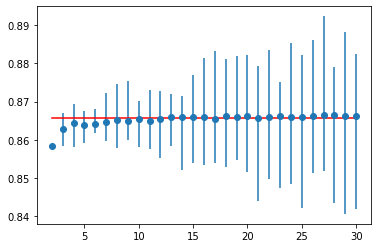

In [115]:
def evaluate_model_svm(cv):
    # get the dataset
    co_vec = CountVectorizer(stop_words='english')
    X = data_tox_done.clean_comments
    X = co_vec.fit_transform(X)
    y = data_tox_done.toxic
    # get the model
    model = LinearSVC()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    #define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show() 

In [116]:
X_train, X_test, y_train, y_test = my_train_test_split_cvec (data_tox_done, 'toxic')

In [120]:
svm = LinearSVC()
paramG_svm = {"C": [ 5, 10, 50, 100]}

svm_grid = GridSearchCV(svm, paramG_svm, scoring='f1', cv=13)
svm_grid.fit(X_train, y_train)
print("Best parameter for Linear SVM: ", svm_grid.best_params_)


C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best parameter for Linear SVM:  {'C': 5}


C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [285]:
# Train SVM with the best parameter
svm_bp = LinearSVC(C=5)

for i in range(13):
    svm_bp.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Results and evaluation 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4535
           1       0.88      0.85      0.87      4642

    accuracy                           0.87      9177
   macro avg       0.87      0.87      0.87      9177
weighted avg       0.87      0.87      0.87      9177

0.8685845047401112
TN 4005
FP 530
FN 676
TP 3966
Accuracy:  0.869
AUC2: 0.869
0.869
Log loss: 0.381


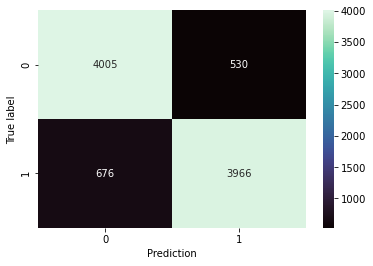

In [286]:
# Prediction
y_pred = svm_bp.predict(X_test)
#y_pred_pr = svm_bp.predict_proba(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#Confusion_matrix
lr_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(lr_matrix, annot=True, fmt = 'g', cmap = 'mako')
p.set_xlabel('Prediction')
p.set_ylabel('True label')

tn, fp, fn, tp = lr_matrix.ravel()
print("TN", tn)
print("FP", fp)
print("FN", fn)
print("TP", tp)

#Other metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),3))
#print("AUC:", np.round(roc_auc_score(y_test, y_pred_pr [:, 1]),3))
print("AUC2:", np.round(roc_auc_score(y_test, y_pred),3))
print(np.round(auc(false_positive_rate, true_positive_rate), 3))
print ("Log loss:", np.round(log_loss(y_test, y_pred_pr),3))

### NB

In [125]:
from sklearn.naive_bayes import MultinomialNB

In [129]:
X_train, X_test, y_train, y_test = my_train_test_split_cvec (data_tox_done, 'toxic')

In [130]:
mnb = MultinomialNB()

for i in range(13):
    mnb.fit(X_train, y_train)

#### Results and Evaluation

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4535
           1       0.90      0.84      0.87      4642

    accuracy                           0.87      9177
   macro avg       0.87      0.87      0.87      9177
weighted avg       0.88      0.87      0.87      9177

0.8731611637790128
TN 4122
FP 413
FN 751
TP 3891
Accuracy:  0.873
AUC: 0.928
AUC2: 0.874
0.874
Log loss: 0.797


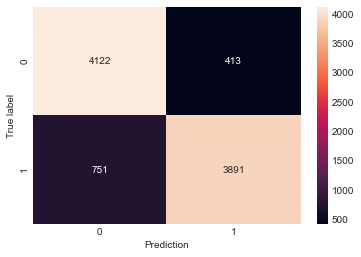

In [133]:
# Prediction
y_pred = mnb.predict(X_test)
y_pred_pr = mnb.predict_proba(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#Confusion_matrix

p = sns.heatmap(lr_matrix, annot=True, fmt = 'g')
p.set_xlabel('Prediction')
p.set_ylabel('True label')

tn, fp, fn, tp = lr_matrix.ravel()
print("TN", tn)
print("FP", fp)
print("FN", fn)
print("TP", tp)

#Other metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),3))
print("AUC:", np.round(roc_auc_score(y_test, y_pred_pr [:, 1]),3))
print("AUC2:", np.round(roc_auc_score(y_test, y_pred),3))
print(np.round(auc(false_positive_rate, true_positive_rate), 3))
print ("Log loss:", np.round(log_loss(y_test, y_pred_pr),3))

### Random Forest

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
X_train, X_test, y_train, y_test = my_train_test_split_cvec (data_tox_done, 'toxic')

In [291]:
ranf = RandomForestClassifier(n_estimators=100, random_state=42)
                              
for i in range(13):
    ranf.fit(X_train, y_train)

#### Results and Evaluation

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4535
           1       0.93      0.79      0.85      4642

    accuracy                           0.86      9177
   macro avg       0.87      0.86      0.86      9177
weighted avg       0.87      0.86      0.86      9177

0.8625912607605971
TN 4250
FP 285
FN 976
TP 3666
Accuracy:  0.863
AUC: 0.945
AUC2: 0.863
0.863
Log loss: 0.357


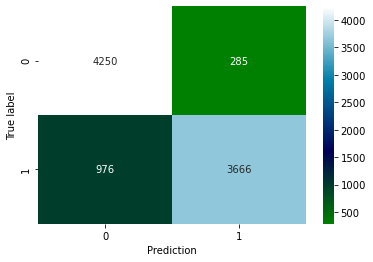

In [292]:
# Prediction
y_pred = ranf.predict(X_test)
y_pred_pr = ranf.predict_proba(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#Confusion_matrix
lr_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(lr_matrix, annot=True, fmt = 'g',cmap = 'ocean')
p.set_xlabel('Prediction')
p.set_ylabel('True label')

tn, fp, fn, tp = lr_matrix.ravel()
print("TN", tn)
print("FP", fp)
print("FN", fn)
print("TP", tp)

#Other metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),3))
print("AUC:", np.round(roc_auc_score(y_test, y_pred_pr [:, 1]),3))
print("AUC2:", np.round(roc_auc_score(y_test, y_pred),3))
print(np.round(auc(false_positive_rate, true_positive_rate), 3))
print ("Log loss:", np.round(log_loss(y_test, y_pred_pr),3))

## TFIDF vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
def my_train_test_split_tf (data, column):

    # Split the data into X and y datasets
    X = data.clean_comments
    y = data[column]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # TFIDF vectorization
    tfidf_vec = TfidfVectorizer(ngram_range=(1,2), 
                            min_df=2, 
                            max_features=1000)
    
    # scaling or standardization of our dataset
    X_train = tfidf_vec.fit_transform(X_train) 
    X_test  = tfidf_vec.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [42]:
X_train, X_test, y_train, y_test = my_train_test_split_tf (data_tox_done, 'toxic')

In [43]:
lr_bpt = LogisticRegression(C=5)

for i in range(13):
    lr_bpt.fit(X_train, y_train)

#### Prediction and mrtrics to compare (LR+CountVectorizer) and (LR+TFIDF)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4535
           1       0.90      0.82      0.86      4642

    accuracy                           0.87      9177
   macro avg       0.87      0.87      0.87      9177
weighted avg       0.87      0.87      0.87      9177

0.8653154625694671
TN 4121
FP 414
FN 822
TP 3820
Accuracy:  0.865
AUC: 0.943
AUC2: 0.866
0.866
Log loss: 0.301


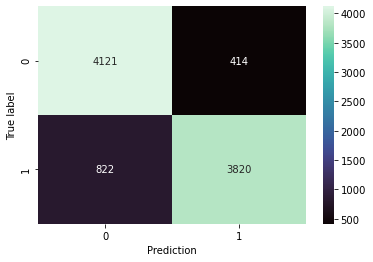

In [48]:
# Prediction
y_pred = lr_bpt.predict(X_test)
y_pred_pr = lr_bpt.predict_proba(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#Confusion_matrix
lr_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(lr_matrix, annot=True, fmt = 'g', cmap = 'mako')
p.set_xlabel('Prediction')
p.set_ylabel('True label')

tn, fp, fn, tp = lr_matrix.ravel()
print("TN", tn)
print("FP", fp)
print("FN", fn)
print("TP", tp)

#Other metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),3))
print("AUC:", np.round(roc_auc_score(y_test, y_pred_pr [:, 1]),3))
print("AUC2:", np.round(roc_auc_score(y_test, y_pred),3))
print(np.round(auc(false_positive_rate, true_positive_rate), 3))
print ("Log loss:", np.round(log_loss(y_test, y_pred_pr),3))

## Multi-label classification

#### Creating a new dataset: all toxic comments + the same amount of non-toxic

In [136]:
data_all_tox = data[data.is_clean == 0].toxic.value_counts()
data_all_tox[1]

15294

In [137]:
data_a_t_0 = data[data.is_clean == 0].head(data_all_tox[1])
data_a_t_1 = data[data.is_clean == 1].head(data_all_tox[1])
data_alt= pd.concat([data_a_t_0, data_a_t_1], axis=0)
data_alt.shape

(30588, 10)

#### Binary Relevance

In [ ]:
pip install scikit-multilearn

In [138]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, log_loss, hamming_loss, accuracy_score

In [139]:
#Splitting the new dataset

labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

X = data_alt.loc[:,'clean_comments']
y = data_alt[labels]

 # Split our data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Because we are handeling text, we need to use vectorisation to transform each text 
    #    into a vector, just like we do in word embedding
vectorizer = CountVectorizer(stop_words='english')
    
    # scaling or standardization of our dataset
X_train = vectorizer.fit_transform(X_train) 
X_test  = vectorizer.transform(X_test)

In [59]:
#lr_clf = BinaryRelevance(LogisticRegression( solver='liblinear'))
#lr_clf.fit(X_train, y_train)

#### Classifier Chain

In [141]:
from sklearn.multioutput import ClassifierChain

In [142]:
lr_chain = ClassifierChain(LogisticRegression(solver='liblinear'))
lr_chain.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


ClassifierChain(base_estimator=LogisticRegression(solver='liblinear'))

In [143]:
#function for evaluation 
def eval_fun_chain(x_test, y_test, classifier):
    # make label predictions
    y_labels = classifier.predict(x_test)
    # make probabilities predictions
    y_pred = classifier.predict_proba(x_test)

    # accuracy score as the average of accuracy for individual labels
    accuracy = np.mean([accuracy_score(y_test.iloc[:,i], y_labels[:,i]) for i in range (6)])

    # hamming loss
    #ham_loss = hamming_loss(y_test, y_labels)

    # auc as the average of auc for individual labels
    auc = np.mean([roc_auc_score(y_test.iloc[:,i], y_labels[:,i]) for i in range (6)])

    # logloss
    logloss = np.mean([log_loss(y_test.iloc[:,i], y_labels[:,i]) for i in range(6)])

    return pd.DataFrame({'Model':'Chain-' + type(classifier.base_estimator).__name__,
                        "Accuracy": np.round(accuracy,3),
                        #"Hamming Loss": np.round(ham_loss,3),
                        "AUC": np.round(auc,3) ,
                        "Log loss": np.round(logloss,3)}, index = [0])

In [144]:
lr_chain_eval = eval_fun_chain(X_test, y_test, lr_chain)
lr_chain_eval

Model  Accuracy    AUC  Log loss
0  Chain-LogisticRegression     0.918  0.698     2.838

# TRY AT DEEP LEARNING: Preparing data for deep learning

In [99]:
# toxic comments

toxic = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]

In [100]:
# non toxic comments

non_toxic = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]

In [101]:
data_tox_done = pd.concat([toxic, non_toxic], axis=0)
data_tox_done.shape

(10000, 3)

**LSTM Modeling**

 - vectorizing the comment by turning each text into a vector
 - limiting the data to 10000 words
 - setting max number of words in comment at 100



In [102]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [103]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max Anumber of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_tox_done['clean_comments'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 34762 unique tokens.


Truncating and pad the input sequences

In [104]:
X = tokenizer.texts_to_sequences(data_tox_done['clean_comments'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (10000, 100)


In [105]:
Y = pd.get_dummies(data_tox_done['toxic']).values
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6700, 100) (6700, 2)
(3300, 100) (3300, 2)


In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



*   First layer is embedded layer using 100 length vectors to represent each word
*   SpatialDropout1d 
*   LSTM layer with 100 memory
*   Output later to create 2 outputs



In [95]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

2022-01-06 23:50:41.821871: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-06 23:50:41.822241: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-06 23:50:41.822270: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-06 23:50:41.822302: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dont-panic): /proc/driver/nvidia/version does not exist
2022-01-06 23:50:41.822591: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appro

Epoch 1/20
95/95 [==============================] - 12s 100ms/step - loss: 0.6315 - accuracy: 0.6398 - val_loss: 0.3395 - val_accuracy: 0.8627
Epoch 2/20
95/95 [==============================] - 9s 95ms/step - loss: 0.2536 - accuracy: 0.9036 - val_loss: 0.3295 - val_accuracy: 0.8821
Epoch 3/20
95/95 [==============================] - 9s 95ms/step - loss: 0.1386 - accuracy: 0.9527 - val_loss: 0.3422 - val_accuracy: 0.8731
Epoch 4/20
95/95 [==============================] - 9s 94ms/step - loss: 0.0789 - accuracy: 0.9731 - val_loss: 0.4128 - val_accuracy: 0.8657
Epoch 5/20
95/95 [==============================] - 9s 96ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.4802 - val_accuracy: 0.8522
Epoch 6/20
95/95 [==============================] - 9s 95ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.6341 - val_accuracy: 0.8388
Epoch 7/20
95/95 [==============================] - 9s 92ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.5944 - val_accuracy: 0.8448
Epoch 8/20


In [96]:
accr = model.evaluate(X_test, y_test)
print('Test Set\n Loss: {:0.3}\n Accuracy: {:0.3f}'.format(accr[0], accr[1]))

104/104 [==============================] - 1s 11ms/step - loss: 0.6487 - accuracy: 0.8573
Test Set
 Loss: 0.649
 Accuracy: 0.857


Creating Keras Model: Embedding + 1CONV1D

In [109]:

from keras import layers, models
def create_embedding_model(vocab_size, max_length):
    model=models.Sequential()
    model.add(layers.Embedding(vocab_size, 100, input_length=max_length))
    model.add(layers.Conv1D(128, 6, activation="relu"))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 12, activation="relu"))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(32, 18, activation="relu"))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation="relu"))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(2,  activation="sigmoid"))   
    return model

In [113]:
#embedding_model = create_embedding_model(vocab_size=MAX_NB_WORDS, max_length=MAX_SEQUENCE_LENGTH)
#embedding_model.summary()

In [114]:
#history = embedding_model.fit(X_train, y_train, epochs=5, batch_size=batch_size,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [115]:
#accr = embedding_model.evaluate(X_test, y_test)
#print('Test Set\n Loss: {:0.3}\n Accuracy: {:0.3f}'.format(accr[0], accr[1]))

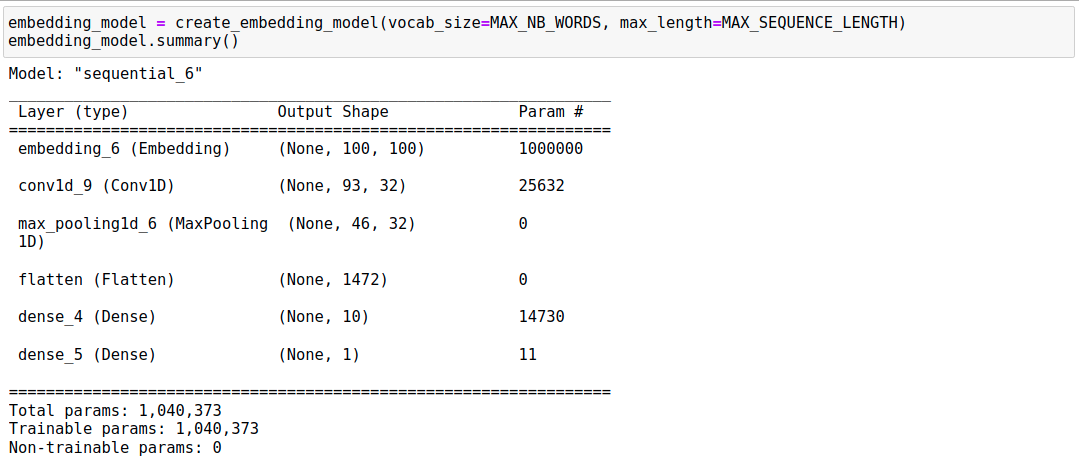

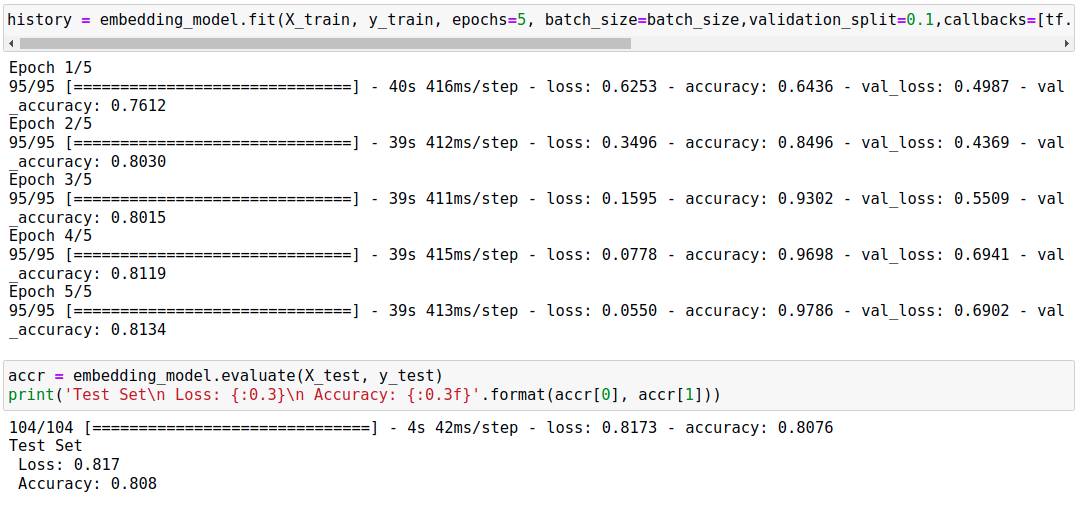